In [1]:
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
text = "The FAANG stocks won’t see much more growth in the near future, according to Bill Studebaker, founder and Chief Investment Officer of Robo Global. \
Studebaker argues we are seeing a 'reallocation' that will continue from large-cap tech stocks into market-weight stocks. \
The FAANG stocks have had a rough few weeks, and have been hit hard since March 12. \
One FAANG to look out for, in the midst of all this, is Amazon, according to Studebaker. \
The stock market is seeing a 'reallocation' out of FAANG stocks, which are not where the smart money is, founder and Chief Investment Officer of Robo Global Bill Studebaker told Business Insider. \
The FAANG stocks (Facebook, Apple, Amazon, Netflix, Google) are all down considerably since March 12, a trend that accelerated when news of a massive Facebook data scandal broke, sending the tech-heavy Nasdaq into a downward frenzy. \
Investors are wondering what’s next. \
And what’s next isn’t good news for FAANG stock optimists, Studebaker thinks. 'This is a dead trade' for the next several months, he said. 'I wouldn’t expect there to be a lot of performance attribution coming from the FAANG stocks,' he added. That is, if the stock market is to see gains in the next several months, they will largely not come from the big tech companies. \
The market is seeing a 'reallocation out of large-cap technology, into other parts of the market,' he said. And this trend could continue for the foreseeable future. 'When you get these reallocation trades, a de-risking, this can go on for months and months.' The FAANG’s are pricey stocks, he said, pointing out that investors will 'factor in the law of big numbers,' he said. 'Just because they’re big cap doesn’t mean they’re safe,' he added. \
Still, he doesn’t necessarily think that investors are going to shift drastically into value stocks. 'With an increasingly favorable macro backdrop, you have strong growth demand.' \
Studebaker, who runs an artificial intelligence and robotics exchange-traded fund with $4 billion in assets under management, thinks that AI and robotics are better areas of growth. His ETF is up 27% in the past year, while the FAANG stocks are also largely up over that same span, even if they are down since March 12. \
While many point to artificial intelligence as an area that will be a boost to Google and Amazon, Studebaker doesn’t see that as a sign of significant growth for the FAANGs. He pointed out that 'eighty to ninety percent of their businesses are still search,' and that 'AI doesn’t really move the needle on the business.' He also said 'the revenue mix [attributable to AI] in those businesses are insignificant.' \
And while he’s not bullish on FAANG’s, he does say that the one FAANG to still watch out for is Amazon, simply because ecommerce still represents a small portion of the global retail market, giving the company room to grow." 
#빈도 기반 요약
def get_sentence(txt):
    return txt.split('.')
def get_words(txt):
    return TreebankWordTokenizer().tokenize(txt)
def get_keywords(word_list , min_ratio=0.001, max_ratio=0.5) :
    assert (min_ratio < 1 and max_ratio < 1) #제약조건, 이걸 만족하지 않으면 종료됨
    count_dict={}
    for word in word_list:
        count_dict.setdefault(word,0)
        count_dict[word]+=1
        keywords=set()
        for word,cnt in count_dict.items():
            word_percentage=count_dict[word]/len(word_list)
        if word_percentage<=max_ratio and word_percentage>=min_ratio:
            keywords.add(word)
        return keywords
def get_sentence_weight(sentence,keywords):
    sen_list=sentence.split(' ')
    window_start =0; window_end=-1; #문서 안에서 중요한 정도 측정
    for i in range(len(sen_list)):#앞에서 부터 키워드 위치 탐색,window영역 설정
        if sen_list[i] in keywords:
            window_start=i
            break
    for i in range(len(sen_list)-1,0,-1):#뒤에서 부터 키워드 위치 탐색,window영역 설정
        if sen_list[i] in keywords:
            window_start=i
            break    
    if window_start>window_end:
        return 0
    window_size = window_end - window_start + 1
    #윈도우 사이즈 대비 나온걸로 영향력 알아냄
    #keywords 0.01 0.05 윈도우 사이즈 사람이 정해주므로 여기가 핵심문장 찾는 기준, 관건
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'words_ls' is not defined

In [4]:
   
    # 2.그래프 기반 요약
    #갯수로 1/n 가중치 한게 아니라 코사인유사도로 가중치 구함
    
from nltk.tokenize import sent_tokenize
import numpy as np
import re
from operator import itemgetter   
import nltk
nltk.download('punkt')

def cosine_similarity(x,y):
    nominator=np.dot(x,y)
    denominator= np.linalg.norm(x)*np.linalg.norm(y)
    return nominator/denominator

def sentence_similarity(sentence1,sentence2):
    setence1=[word.lower() for word in sentence1.split()]
    setence2=[word.lower() for word in sentence2.split()]
    words_ls=list(set(sentence1+sentence2))
    bow1=[0]*len(words_ls) #bag of word [0,0,0,0,0,0]
    bow2=[0]*len(words_ls)
    for word in sentence1:
        bow1[words_ls.index(word)]+=1
    for word in sentence2:
        bow2[words_ls.index(word)]+=1
    return cosine_similarity(bow1,bow2)
sentence_similarity('나는 치킨을 좋아해','나는 치킨을 싫어해')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0.8333333333333335

In [7]:
def buildMatrix(sentences):
    weighted_edge=np.zeros((len(sentences),len(sentences)),dtype=np.float32)
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i==j:
                continue
            weighted_edge[i][j]=sentence_similarity(sentences[i],sentences[j])
    for i in range(len(weighted_edge)):
        weighted_edge[i]/=weighted_edge[i].sum()
    return weighted_edge
buildMatrix(sent_tokenize(text))

array([[0.        , 0.04372929, 0.04186875, 0.0446004 , 0.0463891 ,
        0.04403424, 0.03980374, 0.04178381, 0.04197938, 0.04602547,
        0.04434663, 0.04468691, 0.04506229, 0.04429514, 0.04434619,
        0.04070466, 0.04194049, 0.0420769 , 0.04451124, 0.04305256,
        0.04415211, 0.04389485, 0.04172691, 0.04498903],
       [0.04412331, 0.        , 0.04062955, 0.0418248 , 0.04508793,
        0.04424467, 0.04098929, 0.04113214, 0.0421635 , 0.04407669,
        0.04479494, 0.04623971, 0.0422241 , 0.04416198, 0.04409967,
        0.04119724, 0.04444147, 0.04296413, 0.04566652, 0.04304121,
        0.04488939, 0.04421727, 0.04353478, 0.0442558 ],
       [0.04450507, 0.04280219, 0.        , 0.04150645, 0.04486834,
        0.04661285, 0.0392419 , 0.04027203, 0.04655285, 0.04289433,
        0.04469284, 0.04425314, 0.04066852, 0.0438924 , 0.04517726,
        0.04440012, 0.04067687, 0.04239557, 0.04406234, 0.04737929,
        0.04379795, 0.04372022, 0.04176231, 0.04386521],
       [0.046

In [8]:
def scoring(A, eps=0.0001, d=0.85, max_iter = 50):
    P = np.ones(len(A)) / len(A)
    for iter in range(0,max_iter):
        newP = (1 - d) + d * A.T.dot(P) #dot():행렬 곱셈
        if abs((newP-P).sum())<=eps: 
            return newP
        P=newP
    return newP

In [10]:
scoring(buildMatrix(sent_tokenize(text)))

array([1.01676396, 1.00896877, 0.96511319, 0.98827241, 1.03387292,
       1.00971529, 0.93840409, 0.97209531, 0.99763501, 1.00866166,
       1.02059217, 1.02223187, 0.96948462, 1.02073028, 1.02470193,
       0.9513037 , 0.99904722, 0.96721417, 1.02348322, 1.0043739 ,
       1.02175285, 1.01727118, 0.99232846, 1.01917989])

In [14]:
A=buildMatrix(sent_tokenize(text))
P = np.ones(len(A)) / len(A)
A.T.dot(P)

array([0.04253553, 0.04213685, 0.03991187, 0.04106115, 0.04340368,
       0.04218152, 0.03856533, 0.04026046, 0.04157274, 0.04211996,
       0.04271948, 0.0428053 , 0.04013402, 0.04273781, 0.04293291,
       0.03921892, 0.04162375, 0.04000962, 0.04288401, 0.04190141,
       0.04277846, 0.04256853, 0.04129257, 0.04264412])

In [22]:
import networkx as nx
import math

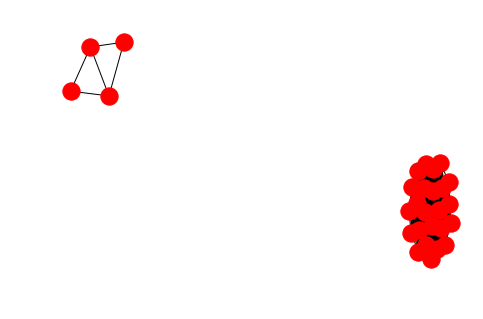

0
3
Investors are wondering what’s next.


In [27]:
import matplotlib.pyplot as plt
def sentences(text):
    return sent_tokenize(text)
def connect(nodes):
    return [(start,end,sentence_similarity(start,end)) for start in nodes for end in nodes if start is not end
            ]
def rank(nodes,edges):
    graph=nx.diamond_graph()
    graph.add_nodes_from(nodes)
    graph.add_weighted_edges_from(edges)
    nx.draw(graph)
    plt.show()
    return nx.pagerank(graph)
def summarize(text,num_summaries=6):
    nodes=sentences(text)
    edges=connect(nodes)
    scores=rank(nodes,edges)
    return sorted(scores,key=scores.get)[:num_summaries]
summary=summarize(text,3)
for sent in summary:
    print(sent)